# Patient's Condition Classification Using Drug Reviews

In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [10]:
#pip install scikit-learn==1.2.2

In [11]:
#Converting the .tsv unstructured file to .csv structured data

tsv_file='drugsCom_raw (1).tsv'
csv_table=pd.read_table(tsv_file,sep='\t')
csv_table.to_csv('drugsCom.csv',index=False)

In [12]:
data = pd.read_csv('drugsCom.csv')
data

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10.0,"May 31, 2015",125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1.0,"November 1, 2011",34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2.0,"March 15, 2014",35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10.0,"September 19, 2015",79


In [13]:
#Filtering the required columns

drug_data = data[["drugName", "condition", "review", "rating", "date", "usefulCount"]]

In [14]:
drug_data.head()

,drugName,condition,review,rating,date,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [15]:
#Filtering the important conditions given & storing into a DataFrame

Drugs = drug_data[(drug_data["condition"] == 'Depression') | (drug_data["condition"] == 'High Blood Pressure') | (drug_data["condition"] == 'Diabetes, Type 2')]

In [16]:
Drugs

,drugName,condition,review,rating,date,usefulCount
11,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10.0,"March 9, 2017",54
31,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8.0,"May 7, 2011",3
44,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4.0,"April 27, 2016",3
50,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10.0,"October 24, 2017",24
67,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10.0,"June 20, 2013",166
...,...,...,...,...,...,...
161251,Metoprolol,High Blood Pressure,"""It is fourth blood pressure pill for me. It f...",4.0,"July 15, 2009",39
161258,Bystolic,High Blood Pressure,"""While on Bystolic my feet and arms were numb....",1.0,"July 18, 2009",25
161278,Invokana,"Diabetes, Type 2","""I just got diagnosed with type 2. My doctor p...",9.0,"October 23, 2015",47
161286,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2.0,"July 17, 2016",33


In [17]:
Drugs.shape

(13944, 6)

In [18]:
#Checking null values

Drugs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13944 entries, 11 to 161290
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   drugName     13944 non-null  object 
 1   condition    13944 non-null  object 
 2   review       13944 non-null  object 
 3   rating       13944 non-null  float64
 4   date         13944 non-null  object 
 5   usefulCount  13944 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 762.6+ KB


In [19]:
Drugs.isnull().sum()

drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [20]:
Drugs.dtypes #data types

drugName        object
condition       object
review          object
rating         float64
date            object
usefulCount      int64
dtype: object

In [21]:
Drugs.describe()

,rating,usefulCount
count,13944.000000,13944.000000
mean,6.862952,45.737880
std,3.207061,51.782627
min,1.000000,0.000000
25%,4.000000,16.000000
50%,8.000000,31.000000
75%,10.000000,59.000000
max,10.000000,1291.000000


In [22]:
#Count of duplicated rows

Drugs[Drugs.duplicated()].shape

(0, 6)

## EDA

In [23]:
Drugs['drugName'].value_counts()

Bupropion                                    549
Sertraline                                   459
Venlafaxine                                  437
Pristiq                                      418
Desvenlafaxine                               414
                                            ... 
Insulin aspart / insulin aspart protamine      1
Tarka                                          1
Exforge HCT                                    1
Bendroflumethiazide / nadolol                  1
Aldomet                                        1
Name: drugName, Length: 334, dtype: int64

In [24]:
(Drugs['drugName'].value_counts()).shape

(334,)

In [25]:
Drugs['drugName'].nunique() #Checking number of drugs under the 3 given conditions

334

In [26]:
#Checking for drugs with maximum Lowest ratings

Drugs.loc[Drugs['rating'] == 1, :]['drugName'].value_counts().head(20)

Lisinopril        74
Venlafaxine       73
Vortioxetine      62
Cymbalta          53
Bupropion         51
Duloxetine        49
Effexor           48
Trulicity         47
Vilazodone        45
Sertraline        44
Pristiq           43
Trintellix        42
Dulaglutide       41
Desvenlafaxine    41
Amlodipine        41
Fluoxetine        36
Losartan          35
Canagliflozin     33
Invokana          32
Viibryd           32
Name: drugName, dtype: int64

In [27]:
Drugs.loc[Drugs['condition'] == 'Depression', :]['drugName'].value_counts().head(20)

Bupropion         549
Sertraline        459
Venlafaxine       437
Pristiq           418
Desvenlafaxine    414
Citalopram        388
Escitalopram      380
Vortioxetine      345
Duloxetine        328
Vilazodone        315
Lexapro           306
Cymbalta          303
Fluoxetine        302
Viibryd           285
Zoloft            281
Trintellix        243
Wellbutrin        230
Celexa            221
Prozac            205
Mirtazapine       205
Name: drugName, dtype: int64

In [28]:
#Checking for drugs with maximum Highest ratings

Drugs.loc[Drugs['rating'] == 10, :]['drugName'].value_counts().head(20)

Bupropion         158
Sertraline        126
Escitalopram      118
Desvenlafaxine    115
Citalopram        112
Pristiq           111
Victoza           101
Liraglutide        99
Venlafaxine        93
Lexapro            86
Fluoxetine         84
Duloxetine         80
Zoloft             73
Viibryd            70
Vilazodone         70
Wellbutrin         68
Cymbalta           67
Exenatide          61
Mirtazapine        58
Prozac             57
Name: drugName, dtype: int64

##### As per the Maximum ratings we can say that the drugs are impactful on those conditions. Wherein, for lowest ratings we can say that the drugs might be used for rare conditions or new in market.

In [29]:
Drugs['condition'].value_counts()

Depression             9069
Diabetes, Type 2       2554
High Blood Pressure    2321
Name: condition, dtype: int64

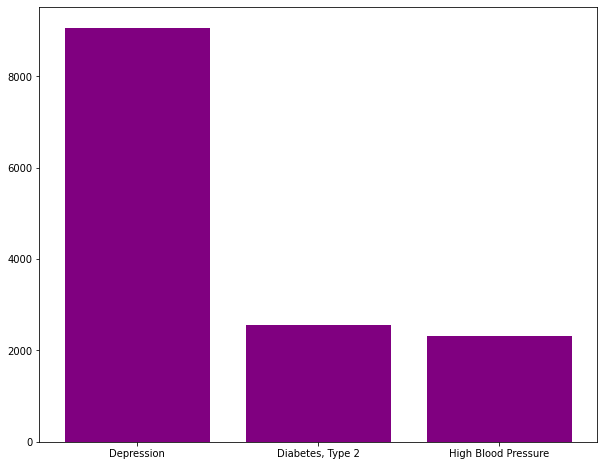

In [30]:
#Plotting the Conditions

plt.figure(figsize=(10,8))
conditions = Drugs['condition'].value_counts()
plt.bar(conditions.index, conditions.values, color='purple')
plt.show()

In [31]:
#Checking number of ratings

ratings_ = Drugs['rating'].value_counts().sort_values(ascending=False).reset_index().\
                    rename(columns = {'index' :'rating', 'rating' : 'counts'})
ratings_['percent'] = 100 * (ratings_['counts']/Drugs.shape[0])
print(ratings_)

   rating  counts    percent
0    10.0    3763  26.986517
1     9.0    2468  17.699369
2     1.0    1802  12.923121
3     8.0    1795  12.872920
4     7.0     995   7.135686
5     5.0     756   5.421687
6     6.0     680   4.876649
7     2.0     645   4.625645
8     3.0     582   4.173838
9     4.0     458   3.284567


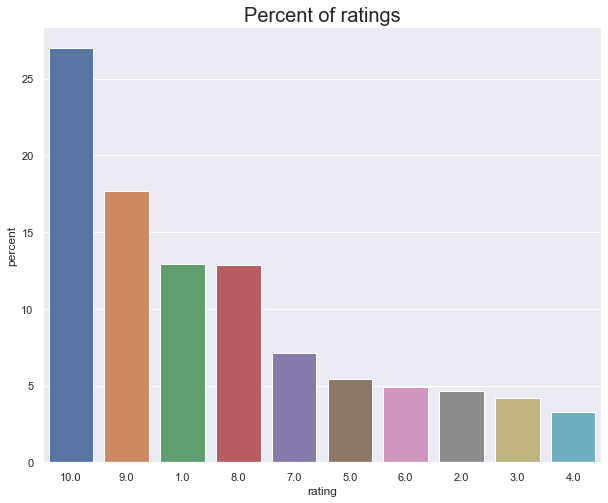

In [32]:
sns.set(font_scale = 1.0)
plt.rcParams['figure.figsize'] = [10, 8]
sns.barplot(x = ratings_['rating'], y = ratings_['percent'],order = ratings_['rating'])
plt.title('Percent of ratings',fontsize=20)
plt.show()

##### As we can see maximum ratings are positive for the drugs as per the medical conditions

In [33]:
#Checking for Most popular drugs for given conditions

Drugs.loc[Drugs['condition'] == 'Depression', :]['drugName'].value_counts().head(20)

Bupropion         549
Sertraline        459
Venlafaxine       437
Pristiq           418
Desvenlafaxine    414
Citalopram        388
Escitalopram      380
Vortioxetine      345
Duloxetine        328
Vilazodone        315
Lexapro           306
Cymbalta          303
Fluoxetine        302
Viibryd           285
Zoloft            281
Trintellix        243
Wellbutrin        230
Celexa            221
Prozac            205
Mirtazapine       205
Name: drugName, dtype: int64

In [34]:
Drugs.loc[Drugs['condition'] == 'High Blood Pressure', :]['drugName'].value_counts().head(20)

Lisinopril                          264
Losartan                            166
Amlodipine                          153
Nebivolol                           110
Bystolic                             99
Metoprolol                           92
Olmesartan                           72
Hydrochlorothiazide                  66
Valsartan                            66
Atenolol                             62
Benicar                              55
Diovan                               43
Azor                                 40
Norvasc                              38
Ramipril                             34
Amlodipine / olmesartan              34
Irbesartan                           33
Cozaar                               33
Clonidine                            33
Hydrochlorothiazide / lisinopril     31
Name: drugName, dtype: int64

In [35]:
Drugs.loc[Drugs['condition'] == 'Diabetes, Type 2', :]['drugName'].value_counts().head(20)

Liraglutide         270
Victoza             255
Dulaglutide         231
Trulicity           221
Exenatide           192
Canagliflozin       146
Invokana            143
Bydureon            136
Metformin            81
Byetta               51
Sitagliptin          51
Dapagliflozin        50
Januvia              47
Insulin glargine     42
Empagliflozin        41
Farxiga              40
Jardiance            39
Glimepiride          33
Glipizide            29
Janumet              26
Name: drugName, dtype: int64

In [36]:
#check the number of drugs as per condition

Drugs.groupby('condition')['drugName'].nunique().sort_values(ascending=False).head()

condition
High Blood Pressure    140
Depression             105
Diabetes, Type 2        89
Name: drugName, dtype: int64

###### Above are the Popular drugs with higher number of usage as per the conditions we can suggest

In [37]:
#Correlation analysis

Drugs.corr()

,rating,usefulCount
rating,1.000000,0.243938
usefulCount,0.243938,1.000000


<AxesSubplot: xlabel='rating'>

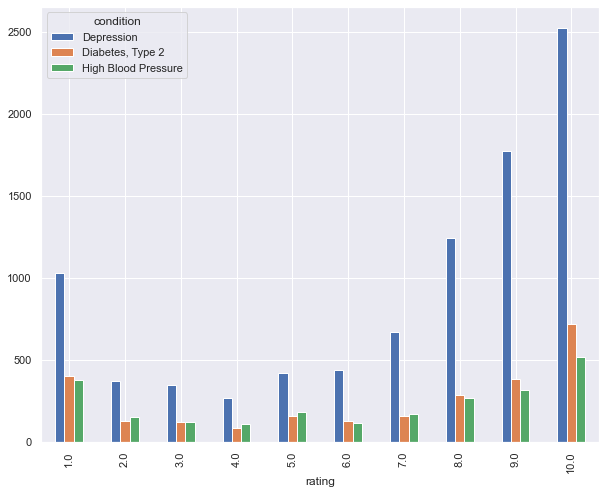

In [38]:
# bar plot between 2 different categories 

pd.crosstab(Drugs['rating'], Drugs['condition']).plot(kind="bar")

In [39]:
#We can conclude that most of the different Drugs which are used are for the Depression with highest reviews

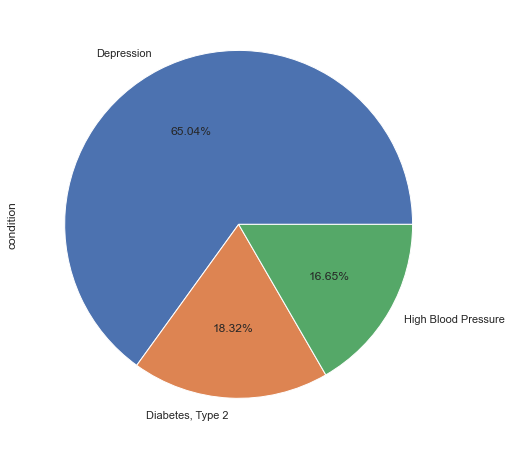

In [40]:
Drugs["condition"].value_counts().plot(kind="pie", autopct='%.2f%%');

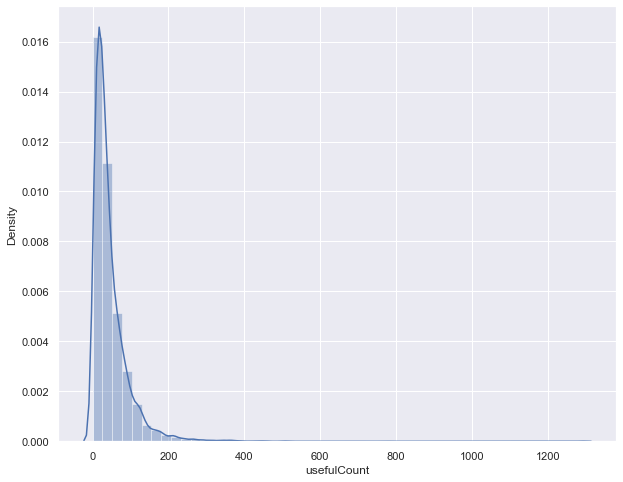

In [41]:
#Plot a distplot of usefulCount

sns.distplot(Drugs['usefulCount'])
plt.show()

In [42]:
#Using WordCloud for reviews

from wordcloud import WordCloud
from wordcloud import STOPWORDS

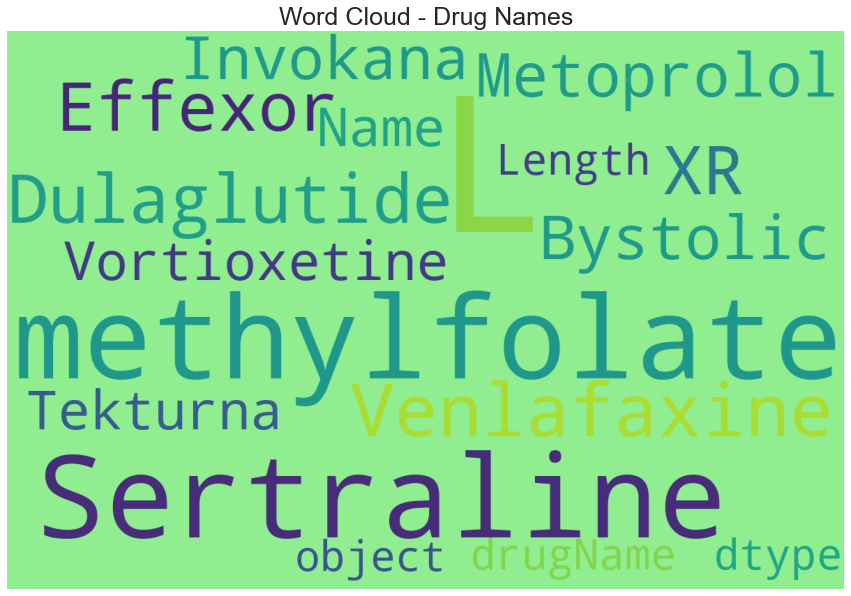

In [43]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'lightgreen', stopwords = stopwords, width = 1200, height = 800).generate(str(Drugs['drugName']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud - Drug Names', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [44]:
len(Drugs.loc[(Drugs['rating'] >= 5)]), len(Drugs.loc[(Drugs['rating'] < 5)])

(10457, 3487)

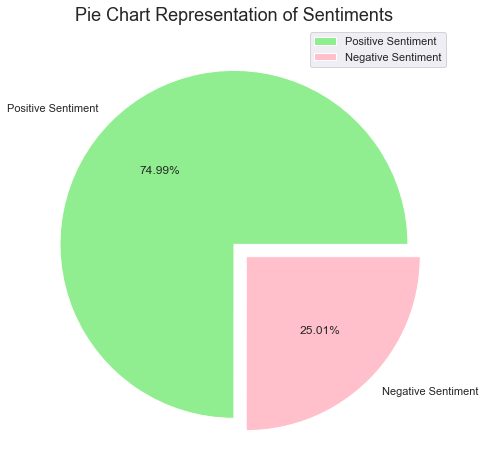

In [45]:
# pie chart to represent the sentiments of the patients

size = [len(Drugs.loc[(Drugs['rating'] >=5)]), len(Drugs.loc[(Drugs['rating'] <5)])]
colors = ['lightgreen', 'pink']
labels = "Positive Sentiment","Negative Sentiment"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Sentiments', fontsize = 18)
plt.legend()
plt.show()

#### Auto EDA

In [46]:
import pandas_profiling

pandas_profiling.ProfileReport(Drugs)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [47]:
X = Drugs.drop(['drugName','rating','date','usefulCount'], axis=1)

In [48]:
X.condition.value_counts()

Depression             9069
Diabetes, Type 2       2554
High Blood Pressure    2321
Name: condition, dtype: int64

In [49]:
X.head()

,condition,review
11,Depression,"""I have taken anti-depressants for years, with..."
31,Depression,"""1 week on Zoloft for anxiety and mood swings...."
44,Depression,"""my gp started me on Venlafaxine yesterday to ..."
50,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l..."
67,Depression,"""This medicine saved my life. I was at my wits..."


In [50]:
# segregating dataframe for analyzing individual condition
X_dep = X[(X['condition']=='Depression')]
X_bp = X[(X['condition']=='High Blood Pressure')]
X_diab = X[(X['condition']=='Diabetes, Type 2')]

Text(0.5, 1.0, 'Word Cloud for Depression')

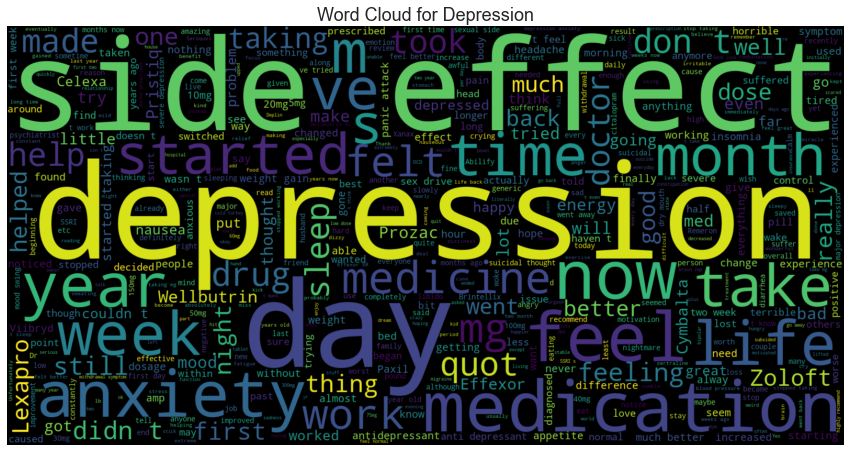

In [51]:
wc1 = WordCloud(max_words=500, stopwords = stopwords, width=1600, height=800).generate(" ".join(X_dep.review))
plt.rcParams['figure.figsize'] = (15, 15)
plt.axis('off')
plt.imshow(wc1, interpolation='bilinear')
plt.title('Word Cloud for Depression', fontsize=18)

Text(0.5, 1.0, 'Word Cloud for High Blood Pressure')

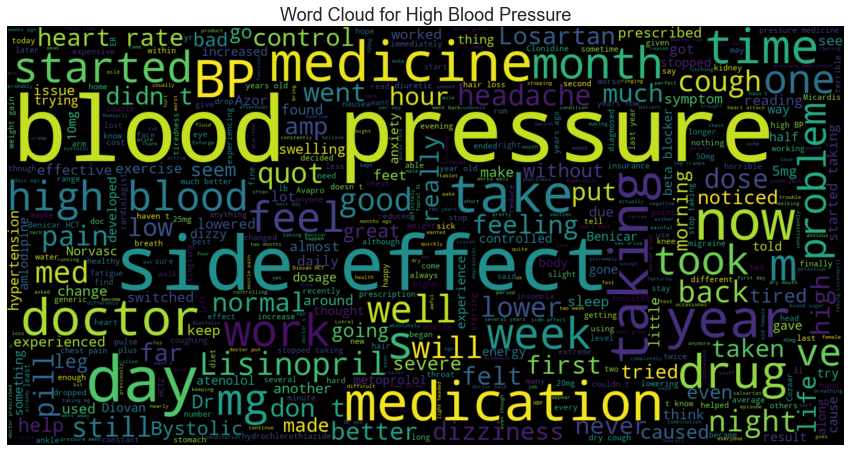

In [52]:
wc2 = WordCloud(max_words=500, stopwords = stopwords, width=1600, height=800).generate(" ".join(X_bp.review))
plt.rcParams['figure.figsize'] = (15, 15)
plt.axis('off')
plt.imshow(wc2, interpolation='bilinear')
plt.title('Word Cloud for High Blood Pressure', fontsize=18)

Text(0.5, 1.0, 'Word Cloud for Diabaties, Type 2')

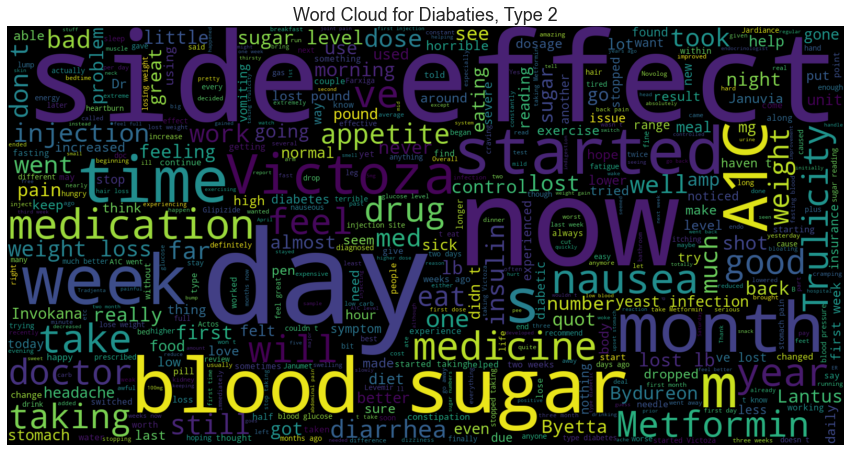

In [53]:
wc3 = WordCloud(max_words=500, stopwords = stopwords, width=1600, height=800).generate(" ".join(X_diab.review))
plt.rcParams['figure.figsize'] = (15, 15)
plt.axis('off')
plt.imshow(wc3, interpolation='bilinear')
plt.title('Word Cloud for Diabaties, Type 2', fontsize=18)

### Data Preprocessing 

In [54]:
X['review'][11]

'"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."'

In [55]:
X['review'][50]

'"Hey Guys,  It&#039;s been 4 months since my last post as I wanted to give it a few months to see how this was going to work.  So, I have been on Trulicity for six months now with Metformin.  When I hit the five month period the diarrhea, gas, sulphur belching finally subsided.  I now longer have any of those side effects.  However, I still haven&#039;t lost any weight at all, but I think that was because when I first started Trulicity I was taking it with Glimepiride and that one has a side effect of weight gain so I think the two meds were fighting each other lol.  I have been back on the Metformin with Trulicity for about a week now, so we will see what this does.  I was diagnosed as  stage 3 chronic kidney disease (CKD 3) so I am watching diet closely."'

In [56]:
for i, col in enumerate(X.columns):
    X.iloc[:, i] = X.iloc[:, i].str.replace('"', '')

In [57]:
# To set the width of the column to maximum
pd.set_option('max_colwidth', -1)

In [58]:
X.head()

,condition,review
11,Depression,"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."
31,Depression,1 week on Zoloft for anxiety and mood swings. I take 50mg in the mornings with my breakfast. Nausea on day one but that subsided as the week went on. I get the jitters about 2 hrs after taking it followed by yawning. I feel much better though and less angry/stressed.
44,Depression,"my gp started me on Venlafaxine yesterday to help with depression and the change,a hour after taking them i was feeling very sick couldn,t stomach food or fluids, thought keep it up as she told me they did come with some side effects which would get better,took another one last night and was so ill i couldn,t stand ,being sick sweating shaking thought i was going to pass out. Did get some sleep hopeing to feel better this morning,took another one and felt so spaced out dry mouth shaking ,sick, so booked in to see gp again to make sure i should be feeling like this, only to find out she had put me on the wrong dose should have been on 37.5mg was put on 150mg, now on right dose hope this will be better"
50,"Diabetes, Type 2","Hey Guys, It&#039;s been 4 months since my last post as I wanted to give it a few months to see how this was going to work. So, I have been on Trulicity for six months now with Metformin. When I hit the five month period the diarrhea, gas, sulphur belching finally subsided. I now longer have any of those side effects. However, I still haven&#039;t lost any weight at all, but I think that was because when I first started Trulicity I was taking it with Glimepiride and that one has a side effect of weight gain so I think the two meds were fighting each other lol. I have been back on the Metformin with Trulicity for about a week now, so we will see what this does. I was diagnosed as stage 3 chronic kidney disease (CKD 3) so I am watching diet closely."
67,Depression,"This medicine saved my life. I was at my wits end with anti-depressants and was ready to give up. My doctor finally prescribed me this after many failed medications, I am so glad she did. I honestly do not know where I would be without Effexor XR. Side effects were very mild compared to other anti-depressants I tried. I was drowsy for the first couple days, but it was tolerable. I highly recommend this for severe depression. I would also like to mention for people to realize there is light at the end of the tunnel and YOU WILL GET BETTER, and to never give up."


#### What are stopwords ?
Stopwords are the most common words in any natural language. For the purpose of building NLP models, these stopwords might not add much value to the meaning of the document.

The most common words used in a text are “the”, “is”, “in”, “for”, “where”, “when”, “to”, “at” etc.

In [59]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

##### Lemmitization

In [60]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

porter = PorterStemmer()

lemmatizer = WordNetLemmatizer()

In [61]:
print(porter.stem("Honestly"))
print(porter.stem("Dedicated"))

honestli
dedic


In [62]:
print(lemmatizer.lemmatize("Honestly"))
print(lemmatizer.lemmatize("Dedicated"))

Honestly
Dedicated


##### Stemming can change the meaning of the particular word wherein, the lemmatization does things properly with the use of a vocabulary and so we will use lemmatization 

In [63]:
#The BeautifulSoup object represents the parsed document as a whole
    
from bs4 import BeautifulSoup
import re #to substitute the values like letters

In [64]:
def review_words(raw_review):
    # Deleting HTML
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # Make a Space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # Lower letters
    words = letters_only.lower().split()
    # stopwords
    meaningful_words = [w for w in words if not w in stop_words]
    # Lemmitization
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    # Space join words
    return(' '.join(lemmitize_words))

In [65]:
X['cleaned_review'] = X['review'].apply(review_words)

In [66]:
X.head()

,condition,review,cleaned_review
11,Depression,"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects.",taken anti depressant year improvement mostly moderate severe side affect make go take cymbalta mostly pain began deplin noticed major improvement overnight energy better disposition sinking low low major depression taking month feel like normal person first time ever best thing side effect
31,Depression,1 week on Zoloft for anxiety and mood swings. I take 50mg in the mornings with my breakfast. Nausea on day one but that subsided as the week went on. I get the jitters about 2 hrs after taking it followed by yawning. I feel much better though and less angry/stressed.,week zoloft anxiety mood swing take mg morning breakfast nausea day one subsided week went get jitter hr taking followed yawning feel much better though le angry stressed
44,Depression,"my gp started me on Venlafaxine yesterday to help with depression and the change,a hour after taking them i was feeling very sick couldn,t stomach food or fluids, thought keep it up as she told me they did come with some side effects which would get better,took another one last night and was so ill i couldn,t stand ,being sick sweating shaking thought i was going to pass out. Did get some sleep hopeing to feel better this morning,took another one and felt so spaced out dry mouth shaking ,sick, so booked in to see gp again to make sure i should be feeling like this, only to find out she had put me on the wrong dose should have been on 37.5mg was put on 150mg, now on right dose hope this will be better",gp started venlafaxine yesterday help depression change hour taking feeling sick stomach food fluid thought keep told come side effect would get better took another one last night ill stand sick sweating shaking thought going pas get sleep hopeing feel better morning took another one felt spaced dry mouth shaking sick booked see gp make sure feeling like find put wrong dose mg put mg right dose hope better
50,"Diabetes, Type 2","Hey Guys, It&#039;s been 4 months since my last post as I wanted to give it a few months to see how this was going to work. So, I have been on Trulicity for six months now with Metformin. When I hit the five month period the diarrhea, gas, sulphur belching finally subsided. I now longer have any of those side effects. However, I still haven&#039;t lost any weight at all, but I think that was because when I first started Trulicity I was taking it with Glimepiride and that one has a side effect of weight gain so I think the two meds were fighting each other lol. I have been back on the Metformin with Trulicity for about a week now, so we will see what this does. I was diagnosed as stage 3 chronic kidney disease (CKD 3) so I am watching diet closely.",hey guy month since last post wanted give month see going work trulicity six month metformin hit five month period diarrhea gas sulphur belching finally subsided longer side effect however still lost weight think first started trulicity taking glimepiride one side effect weight gain think two med fighting lol back metformin trulicity week see diagnosed stage chronic kidney disease ckd watching diet closely
67,Depression,"This medicine saved my life. I was at my wits end with anti-depressants and was ready to give up. My doctor finally prescribed me this after many failed medications, I am so glad she did. I honestly do not know where I would be without Effexor XR. Side effects were very mild compared to other anti-depressants I tried. I was drowsy for the first couple days, but it was tolerable. I highly recom

## Model Building 

In [67]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [68]:
# Selecting Testing and Target Variable

x_feature = X['cleaned_review']
y = X['condition']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(x_feature, y, stratify=y, test_size=0.3, random_state=12)

### Bag of Words

In [70]:
count_vector = CountVectorizer(stop_words='english')

count_train = count_vector.fit_transform(X_train)

count_test = count_vector.transform(X_test)

In [71]:
count_train
#Count Vector basically calculates the mode of words in a text data & returns the sparse matrix of the same

<9760x10670 sparse matrix of type '<class 'numpy.int64'>'
	with 287951 stored elements in Compressed Sparse Row format>

In [72]:
count_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## Multinominal Naive Bayes Model : Count Vectorizer

In [73]:
# P(A | B) = P(B | A).P(A)/P(B) with the help of probability as per the given attributes Naive Bayes gives outcome with high probability & will monitor the number of words occur in given review data & counts the probability to define the condition
# Naive Bayes is high bias & low variance

mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)

In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix

score = accuracy_score(y_test, pred)
print("Accuracy : ", score)
#print("Accuracy : ", accuracy_score(y_test, pred))

Accuracy :  0.9519598470363289


In [75]:
#Using Confusion Matrics to verify how many conditions were satisfied

confusion_matrix(y_test, pred)

array([[2667,   26,   28],
       [  36,  700,   30],
       [  60,   21,  616]], dtype=int64)

In [76]:
pd.crosstab(y_test, pred) #y-axis is actual data

col_0,Depression,"Diabetes, Type 2",High Blood Pressure
condition,,,
Depression,2667,26,28
"Diabetes, Type 2",36,700,30
High Blood Pressure,60,21,616


In [77]:
# For above code pipepline approach 

from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('Vecotorizer', CountVectorizer()),
    ('MNB', MultinomialNB())
])

In [78]:
clf.fit(X_train,y_train)

Pipeline(steps=[('Vecotorizer', CountVectorizer()), ('MNB', MultinomialNB())])

In [79]:
clf.score(X_test, y_test)

0.9550669216061185

In [80]:
#Model prediction

from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(y_test, pred))
print("Precision : ", precision_score(y_test, pred, average='weighted'))
print("Recall : ", recall_score(y_test, pred, average='weighted'))

Accuracy :  0.9519598470363289
Precision :  0.9515498581358668
Recall :  0.9519598470363289


### TF - IDF

##### TF - term frequency of a word in total number of words. IDF - Inverse document frequecy number of sentences in total number of sentences containing words
#### TF * IDF using this creates features to highlight words which are frequent in documents

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vector = TfidfVectorizer(stop_words = 'english', max_df=0.8)

tfidf_train = tfidf_vector.fit_transform(X_train)

tfidf_test = tfidf_vector.transform(X_test)

## Multinominal Naive Bayes Model : TFIDF Vectorizer

In [82]:
mnb_tfidf = MultinomialNB()
mnb_tfidf.fit(tfidf_train, y_train)
tfidf_pred = mnb_tfidf.predict(tfidf_test)

In [83]:
#Model prediction

print("Accuracy : ", accuracy_score(y_test, tfidf_pred))
print("Precision : ", precision_score(y_test, tfidf_pred, average='weighted'))
print("Recall : ", recall_score(y_test, tfidf_pred, average='weighted'))

Accuracy :  0.884321223709369
Precision :  0.8976346769645354
Recall :  0.884321223709369


## BERT Pretrained Model 

https://huggingface.co/models
Use a model trained of a large corpus of data
Transformer model accounts for the words but also the context related to other words

In [84]:
#!pip install transformers
#from transformers import AutoTokenizer, AutoModelForSequenceClassificatione
#import torch
#import request

In [85]:
#pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

## Passive Aggressive Classifier Model : TFIDF Vectorizer

In [86]:
pac = PassiveAggressiveClassifier()
pac.fit(tfidf_train, y_train)
pac_pred = pac.predict(tfidf_test)

In [87]:
print("Accuracy : ", accuracy_score(y_test, pac_pred))
print("Precision : ", precision_score(y_test, pac_pred, average='weighted'))
print("Recall : ", recall_score(y_test, pac_pred, average='weighted'))

Accuracy :  0.9593690248565966
Precision :  0.9591169618248259
Recall :  0.9593690248565966


#### TFIDF Vectorizer: Bigrams

In [88]:
tfidf_vector2 = TfidfVectorizer(stop_words = 'english', max_df=0.8, ngram_range=(1,2))

tfidf_train2 = tfidf_vector2.fit_transform(X_train)

tfidf_test2 = tfidf_vector2.transform(X_test)

In [89]:
pacbi = PassiveAggressiveClassifier()
pacbi.fit(tfidf_train2, y_train)
pacbi_pred = pacbi.predict(tfidf_test2)

In [90]:
print("Accuracy : ", accuracy_score(y_test, pacbi_pred))
print("Precision : ", precision_score(y_test, pacbi_pred, average='weighted'))
print("Recall : ", recall_score(y_test, pacbi_pred, average='weighted'))

Accuracy :  0.9667782026768642
Precision :  0.9666486874596436
Recall :  0.9667782026768642


In [91]:
pd.crosstab(y_test, pacbi_pred) #y-axis is actual data

col_0,Depression,"Diabetes, Type 2",High Blood Pressure
condition,,,
Depression,2694,10,17
"Diabetes, Type 2",29,721,16
High Blood Pressure,57,10,630


#### TFIDF Vectorizer: Trigrams

In [92]:
tfidf_vector3 = TfidfVectorizer(stop_words = 'english', max_df=0.8, ngram_range=(1,3))

tfidf_train3 = tfidf_vector3.fit_transform(X_train)

tfidf_test3 = tfidf_vector3.transform(X_test)

In [93]:
pactri = PassiveAggressiveClassifier()
pactri.fit(tfidf_train3, y_train)
pactri_pred = pactri.predict(tfidf_test3)

In [94]:
print("Accuracy : ", accuracy_score(y_test, pactri_pred))
print("Precision : ", precision_score(y_test, pactri_pred, average='weighted'))
print("Recall : ", recall_score(y_test, pactri_pred, average='weighted'))

Accuracy :  0.9663001912045889
Precision :  0.9661859297987068
Recall :  0.9663001912045889


In [95]:
pd.crosstab(y_test, pactri_pred)

col_0,Depression,"Diabetes, Type 2",High Blood Pressure
condition,,,
Depression,2694,11,16
"Diabetes, Type 2",31,722,13
High Blood Pressure,58,12,627


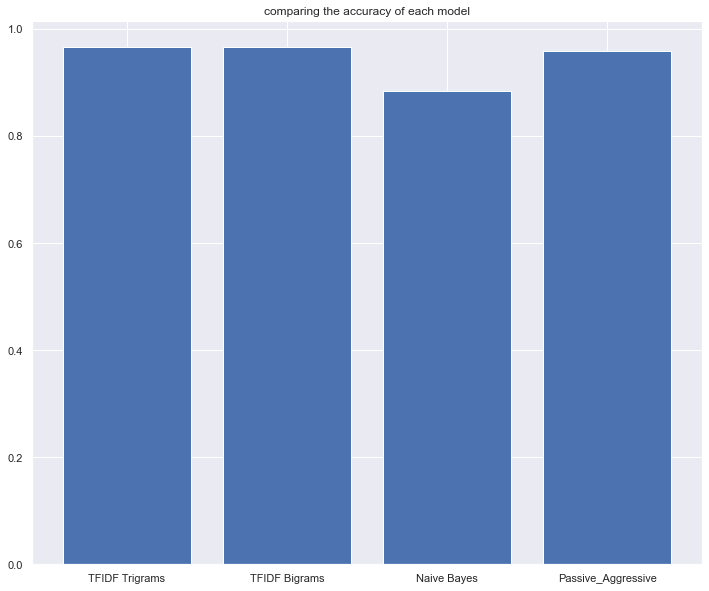

In [96]:
#Finalizing TF IDF Trigrams model as below comparison

Accuracy = [accuracy_score(y_test, pactri_pred), accuracy_score(y_test, pacbi_pred), accuracy_score(y_test, tfidf_pred),accuracy_score(y_test, pac_pred)]
Methods = ['TFIDF Trigrams', 'TFIDF Bigrams', 'Naive Bayes', 'Passive_Aggressive']
Accuracy_pos = np.arange(len(Methods))
plt.figure(figsize=(12,10))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title('comparing the accuracy of each model')
plt.show()

#### Sample Predictions

In [99]:
# Function for Extracting Top drugs

def top_drugs(condition):
    topdrugs = Drugs[(Drugs['rating']>=9)&(Drugs['usefulCount']>=100)].sort_values(by = ['rating', 'usefulCount'], ascending = [False, False])
    drug_lst = topdrugs[topdrugs['condition']==condition]['drugName'].head(4).tolist()
    return drug_lst


In [100]:
X.head()

,condition,review,cleaned_review
11,Depression,"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects.",taken anti depressant year improvement mostly moderate severe side affect make go take cymbalta mostly pain began deplin noticed major improvement overnight energy better disposition sinking low low major depression taking month feel like normal person first time ever best thing side effect
31,Depression,1 week on Zoloft for anxiety and mood swings. I take 50mg in the mornings with my breakfast. Nausea on day one but that subsided as the week went on. I get the jitters about 2 hrs after taking it followed by yawning. I feel much better though and less angry/stressed.,week zoloft anxiety mood swing take mg morning breakfast nausea day one subsided week went get jitter hr taking followed yawning feel much better though le angry stressed
44,Depression,"my gp started me on Venlafaxine yesterday to help with depression and the change,a hour after taking them i was feeling very sick couldn,t stomach food or fluids, thought keep it up as she told me they did come with some side effects which would get better,took another one last night and was so ill i couldn,t stand ,being sick sweating shaking thought i was going to pass out. Did get some sleep hopeing to feel better this morning,took another one and felt so spaced out dry mouth shaking ,sick, so booked in to see gp again to make sure i should be feeling like this, only to find out she had put me on the wrong dose should have been on 37.5mg was put on 150mg, now on right dose hope this will be better",gp started venlafaxine yesterday help depression change hour taking feeling sick stomach food fluid thought keep told come side effect would get better took another one last night ill stand sick sweating shaking thought going pas get sleep hopeing feel better morning took another one felt spaced dry mouth shaking sick booked see gp make sure feeling like find put wrong dose mg put mg right dose hope better
50,"Diabetes, Type 2","Hey Guys, It&#039;s been 4 months since my last post as I wanted to give it a few months to see how this was going to work. So, I have been on Trulicity for six months now with Metformin. When I hit the five month period the diarrhea, gas, sulphur belching finally subsided. I now longer have any of those side effects. However, I still haven&#039;t lost any weight at all, but I think that was because when I first started Trulicity I was taking it with Glimepiride and that one has a side effect of weight gain so I think the two meds were fighting each other lol. I have been back on the Metformin with Trulicity for about a week now, so we will see what this does. I was diagnosed as stage 3 chronic kidney disease (CKD 3) so I am watching diet closely.",hey guy month since last post wanted give month see going work trulicity six month metformin hit five month period diarrhea gas sulphur belching finally subsided longer side effect however still lost weight think first started trulicity taking glimepiride one side effect weight gain think two med fighting lol back metformin trulicity week see diagnosed stage chronic kidney disease ckd watching diet closely
67,Depression,"This medicine saved my life. I was at my wits end with anti-depressants and was ready to give up. My doctor finally prescribed me this after many failed medications, I am so glad she did. I honestly do not know where I would be without Effexor XR. Side effects were very mild compared to other anti-depressants I tried. I was drowsy for the first couple days, but it was tolerable. I highly recom

In [101]:
sentence = ['my gp started me on Venlafaxine yesterday to help with depression and the change,a hour after taking them i was feeling very sick couldn,t stomach food or fluids, thought keep it up as she told me they did come with some side effects which would get better,took another one last night and was so ill i couldn,t stand ,being sick sweating shaking thought i was going to pass out. Did get some sleep hopeing to feel better this morning,took another one and felt so spaced out dry mouth shaking ,sick, so booked in to see gp again to make sure i should be feeling like this, only to find out she had put me on the wrong dose should have been on 37.5mg was put on 150mg, now on right dose hope this will be better']

In [102]:
tfidf_trigram = tfidf_vector3.transform(sentence)

prediction = pactri.predict(tfidf_trigram)

In [103]:
for text, label in zip(sentence, prediction):
    if label=="High Blood Pressure":
        target="High Blood Pressure"
        top_drugs = top_drugs(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Depression":
        target="Depression"
        top_drugs = top_drugs(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    else:
        target="Diabetes, Type 2"
        top_drugs = top_drugs(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

text: my gp started me on Venlafaxine yesterday to help with depression and the change,a hour after taking them i was feeling very sick couldn,t stomach food or fluids, thought keep it up as she told me they did come with some side effects which would get better,took another one last night and was so ill i couldn,t stand ,being sick sweating shaking thought i was going to pass out. Did get some sleep hopeing to feel better this morning,took another one and felt so spaced out dry mouth shaking ,sick, so booked in to see gp again to make sure i should be feeling like this, only to find out she had put me on the wrong dose should have been on 37.5mg was put on 150mg, now on right dose hope this will be better 
Condition: Depression
Top 3 Suggested Drugs:
Sertraline
Zoloft
Viibryd



In [104]:
def predict_text(text):
    df_test = pd.DataFrame(text, columns = ['senteces'])
    df_test["senteces"] = df_test["senteces"].apply(review_words)
    tfidf_trigram = tfidf_vector3.transform(text)
    prediction = pactri.predict(tfidf_trigram)
    df_test['prediction']=prediction
    return df_test

In [105]:
sent = predict_text(sentence)
sent

,senteces,prediction
0,gp started venlafaxine yesterday help depression change hour taking feeling sick stomach food fluid thought keep told come side effect would get better took another one last night ill stand sick sweating shaking thought going pas get sleep hopeing feel better morning took another one felt spaced dry mouth shaking sick booked see gp make sure feeling like find put wrong dose mg put mg right dose hope better,Depression


In [106]:
#Saving the finalized model

import joblib
joblib.dump(tfidf_vector3, 'tfidfvectorizer.pkl')
joblib.dump(pactri, 'PACmodel.pkl')

['PACmodel.pkl']